# Which Pittsburgh Tech Groups Are The Most Prominent?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

### First, let's load in the dataset.

In [2]:
# The dataset we will be using can be found at my github.
# It was obtained via the meetup.com API using a custom python script I created.
# If you'd like to generate a more recent dataset on Pittsburgh and/or a different location, 
# check out https://github.com/awgraves/meetup_api

df = pd.read_csv("pgh_meetup_groups_Jan_27_2018.csv")
df.head()

,name,urlname,city,lat,lon,category,created,status,members,join_mode,past_event_count,last_event,last_rsvp
0,Free and Almost Free in Pittsburgh,pittsburgh-free,Pittsburgh,40.47,-79.95,Socializing,2010-12-30 23:15:54,active,17806,open,9885,2018-01-26 21:00:00,2
1,The Pittsburgh Hiking Meetup Group,pittsburghhikers,Pittsburgh,40.45,-79.99,Outdoors & Adventure,2007-05-29 06:48:49,active,6880,approval,3929,2018-01-26 17:45:00,10
2,The Pittsburgh Cultural Arts Meetup Group,Art-lovers,Pittsburgh,40.44,-79.95,Arts & Culture,2008-11-10 20:40:33,active,6253,open,1239,2018-01-26 19:00:00,9
3,Pittsburgh Singles Over-50 Meetup,Pittsburgh-Singles-Meetup,Pittsburgh,40.45,-79.99,Socializing,2016-12-30 22:38:58,active,553,approval,74,2018-01-17 17:45:00,25
4,The Pittsburgh Social Club!,Pittsburgh-Social-Club,Pittsburgh,40.47,-79.92,Socializing,2011-01-27 19:15:11,active,5319,open,3607,2018-01-26 21:00:00,2


In [3]:
df.shape

(943, 13)

### The original dataset contains all meetups within a 50 mile radius, but let's only look at Pittsburgh and not the surrounding area:

In [4]:
df = df[df["city"]=="Pittsburgh"]
df.reset_index(drop=True, inplace=True)
df.shape

(687, 13)

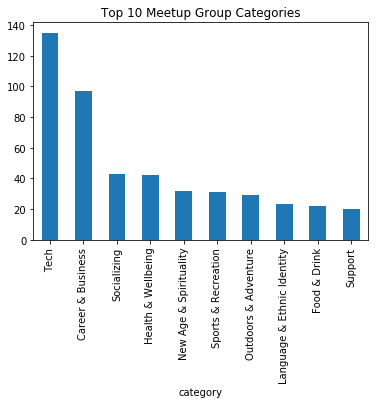

In [5]:
%matplotlib inline

#Which categories are most popular?
cat_group_counts = df.groupby("category").size().sort_values(ascending=False)[:10]

cat_group_counts.plot(kind="bar", title="Top 10 Meetup Group Categories")

In [6]:
print(cat_group_counts.keys().tolist())

['Tech', 'Career & Business', 'Socializing', 'Health & Wellbeing', 'New Age & Spirituality', 'Sports & Recreation', 'Outdoors & Adventure', 'Language & Ethnic Identity', 'Food & Drink', 'Support']


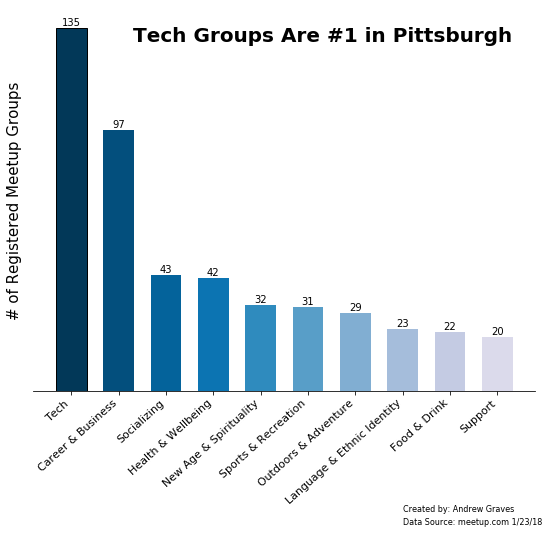

In [7]:
#Let's make this bar chart nice and pretty
from matplotlib import cm
color = cm.PuBu(np.linspace(1, .2, 10)) #import the colormap to color the bars

N = 10
group_values = cat_group_counts.tolist() #number of groups for each in the top 10
group_labels = cat_group_counts.keys().tolist() #names of groups in the top 10

ind = np.arange(N)  # the x locations for the groups
width = 0.65       # the width of the bars

#create the figure and axes
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(1,1,1)

groups = ax.bar(ind, group_values, width, color=color, linewidth=1.0, edgecolor = "black")

# add some axis labels and clean up the graph space of unnecessary ink
ax.set_ylabel('# of Registered Meetup Groups', size=15)
ax.set_xticks(ind)
ax.set_xticklabels(group_labels, rotation = 42, ha="right", size = 11)
ax.tick_params(left="off")
ax.set_yticklabels([])
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)

#add text
ax.text(1.30,130,"Tech Groups Are #1 in Pittsburgh", horizontalalignment='left', size = 20, weight="bold")
ax.text(7.0, -45, "Created by: Andrew Graves", horizontalalignment="left", size=8)
ax.text(7.0, -50, "Data Source: meetup.com 1/23/18", horizontalalignment="left", size=8)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height + .2,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(groups)

#export the bar chart to a file
plt.savefig('tech_groups_pgh.jpeg', edgecolor='black', bbox_inches='tight', facecolor=fig.get_facecolor(), frameon=True)
plt.show()

# Which of the 135 different tech groups are the most prominent?

In [8]:
#only want tech groups
df = df[df["category"]=="Tech"].reset_index(drop=True)

#our category column is now redundant
df.drop(["category"], axis = 1, inplace = True)

In [9]:
df.shape

(135, 12)

In [10]:
#get rid of some unnecessary columns for the purpose of our investigation
df.drop(["city","lat","lon"], inplace = True, axis = 1)

In [11]:
df.head()

,name,urlname,created,status,members,join_mode,past_event_count,last_event,last_rsvp
0,Blockchain Developers and Enthusiasts United,blockchainpgh,2017-10-28 19:35:41,active,215,open,6,2018-01-18 18:30:00,67
1,WordPress Pittsburgh,Pittsburgh-WordPress-Developers-Designers,2014-08-06 08:00:37,active,822,open,57,2018-01-09 07:30:00,17
2,Pittsburgh Code & Supply,Pittsburgh-Code-Supply,2014-03-20 09:40:46,active,3562,open,314,2018-01-24 19:00:00,26
3,Girl Develop It Pittsburgh,Girl-Develop-It-Pittsburgh,2012-06-13 20:49:34,active,2058,open,96,2018-01-18 19:00:00,37
4,PGH Data Science,PGH-Data-Science,2017-02-02 15:37:53,active,758,open,9,2018-01-10 16:00:00,72


In [12]:
# We don't want to join a group that is in a grace period!
df.status.value_counts()

active    135
Name: status, dtype: int64

In [13]:
#Looks like all are active, but just in case you want to load in a new dataset lets be sure we get it right...
df = df[df["status"] == "active"]

#The status column is now redundant
df.drop(["status"], axis = 1, inplace = True)
df.shape

(135, 8)

In [14]:
#we also don't really care about how the members join
df.drop(["join_mode"], axis = 1, inplace = True)

In [15]:
#one more filtering criteria:  no missing values.  The last_event column is a datetime object,
#and if there were any groups with no past events, this column will be a NaN (missing value).
df.dropna(axis = 0, inplace = True)
df.reset_index(inplace=True, drop=True)
df.shape

(115, 7)

In [16]:
#lastly, let's convert our datetime columns for later use. (We need to tell pandas these are dates)
df["created"] = pd.to_datetime(df["created"])
df["last_event"] = pd.to_datetime(df["last_event"])
df.head()

,name,urlname,created,members,past_event_count,last_event,last_rsvp
0,Blockchain Developers and Enthusiasts United,blockchainpgh,2017-10-28 19:35:41,215,6,2018-01-18 18:30:00,67
1,WordPress Pittsburgh,Pittsburgh-WordPress-Developers-Designers,2014-08-06 08:00:37,822,57,2018-01-09 07:30:00,17
2,Pittsburgh Code & Supply,Pittsburgh-Code-Supply,2014-03-20 09:40:46,3562,314,2018-01-24 19:00:00,26
3,Girl Develop It Pittsburgh,Girl-Develop-It-Pittsburgh,2012-06-13 20:49:34,2058,96,2018-01-18 19:00:00,37
4,PGH Data Science,PGH-Data-Science,2017-02-02 15:37:53,758,9,2018-01-10 16:00:00,72


## So, let's begin with the most obvious metric: membership.  

## The more members, the more thriving the group, right?  Let's take a look:

In [17]:
top_membership = df.sort_values("members", ascending=False).reset_index(drop=True)
top_membership.head(5)

,name,urlname,created,members,past_event_count,last_event,last_rsvp
0,Pittsburgh Code & Supply,Pittsburgh-Code-Supply,2014-03-20 09:40:46,3562,314,2018-01-24 19:00:00,26
1,Girl Develop It Pittsburgh,Girl-Develop-It-Pittsburgh,2012-06-13 20:49:34,2058,96,2018-01-18 19:00:00,37
2,Pgh Tech Meetup,Pgh-Tech,2010-05-04 19:35:19,1916,139,2017-11-18 08:30:00,1
3,HackPGH,HackPGH,2015-05-27 07:38:41,1623,79,2018-01-17 19:00:00,17
4,Pittsburgh Agile (@PittAgile | #PittAgile),PittsburghAgile,2011-03-02 11:31:00,1465,72,2018-01-24 18:00:00,27


### Wow, not bad!  The top groups range from roughly 1.5 to 3.5 k members each!

### But wait a moment...take a look at those event rsvp counts...

### A thriving group should also have lots of rsvps, right?  Hmm...

## Ok, let's sort the groups by last rsvp count:

In [18]:
top_rsvp = df.sort_values("last_rsvp", ascending=False).reset_index(drop=True)
top_rsvp.head(5)

,name,urlname,created,members,past_event_count,last_event,last_rsvp
0,PGH Data Science,PGH-Data-Science,2017-02-02 15:37:53,758,9,2018-01-10 16:00:00,72
1,Blockchain Developers and Enthusiasts United,blockchainpgh,2017-10-28 19:35:41,215,6,2018-01-18 18:30:00,67
2,Google Developer Group (GDG) Pittsburgh,gdg-pitt,2017-01-24 09:29:22,377,3,2017-09-30 10:00:00,50
3,Steel City Information Security,Steel-City-InfoSec,2012-10-30 12:59:15,788,57,2018-01-10 18:00:00,50
4,Pittsburgh Big Data Meetups,Pittsburgh-Big-Data-Meetups,2015-03-04 09:55:47,603,10,2016-03-22 19:00:00,49


## PGH Data Science tops the ranking at 72!  
(As it so happens, I was at that event, and we did not have 72 people.  I would estimate it was probably more like 40.  Still pretty good!)

## However, it would be a fairer metric to consider more than just a single recent rsvp count for each group...  

## 5 seems like a good arbitrary number to use - it should be robust enough to have a more representative mean yet small to keep things as current as possible (and not let rsvps from too long ago spoil the score)

## Our original dataset does not contain this information, so let's go back to the meetup.com API and gather the RSVPs for each group's 5 most recently held events

In [19]:
df.shape

(115, 7)

### (Note that if you want to gather fresh data, start by putting your API key here.  Otherwise, skip down
### and allow the csv file to be imported from when I made the API requests on Jan 27, 2018)

In [20]:
import requests
import time

In [21]:
#If you'd like to create an up to date rsvp average, place your meetup.com API key here
key = "XXXXXXXXXXXX"

#note that "page" is set to 5.  This will limit our results to the 5 most event events.
def get_sample_rsvps(group_url): #take a single group url and return the raw API response with event sample
        parameters = {"key":key, "sign":"true", "status":"past", "page":"5", "only":"yes_rsvp_count"}
        
        search_url = "https://api.meetup.com/{}/events".format(group_url)
        response = requests.get(search_url, params = parameters) #make the API request
        status = response.status_code #get the status of our request
        data = response.json() #convert the JSON data to python dictionaries
        #print(status)
        time.sleep(.25) #keep this timer here! Don't throttle the server and have to wait an hour to be unblocked like me!
        return data
    
    
def extract_rsvp_mean(raw_list): #take in a raw list of the API responses and output a new list with mean rsvp counts
    mean_rsvps = []
    for group in raw_list:
        rsvp_list = []
        for event in group:
            rsvp = int(event["yes_rsvp_count"])
            rsvp_list.append(rsvp)
        if len(rsvp_list) > 0:    
            mean = np.mean(rsvp_list)
            mean_rsvps.append(mean)
        else:
            mean_rsvps.append(np.nan)
    return mean_rsvps        

### (Remove the #'s from the following lines if you are doing your own API requests)

In [22]:
# raw_list = df["urlname"].apply(get_sample_rsvps)


In [23]:
# print(raw_list[100]) #an example group

[{'yes_rsvp_count': 20}]

In [24]:
# mean_rsvp = extract_rsvp_mean(raw_list)

In [25]:
# print(len(raw_list), len(mean_rsvp)) #make sure the number of entries match between the raw data and our mean rsvp list

115 115


In [26]:
# mean_rsvps_df = pd.DataFrame(data = df["urlname"], columns = ["urlname"])
# mean_rsvps_df["mean_rsvp"] = mean_rsvp
# mean_rsvps_df.head()

,urlname,mean_rsvp
0,blockchainpgh,38.6
1,Pittsburgh-WordPress-Developers-Designers,11.4
2,Pittsburgh-Code-Supply,10.8
3,Girl-Develop-It-Pittsburgh,29.6
4,PGH-Data-Science,71.0


In [27]:
# mean_rsvps_df["mean_rsvp"].isnull().value_counts()

False    115
Name: mean_rsvp, dtype: int64

In [28]:
# Woohoo! No null values, so that means we have the means for all the groups and can export the csv!
# mean_rsvps_df.to_csv("last_five_rsvp_means.csv", index=False)

## Read in the mean rsvps data and merge it with our main dataframe

In [29]:
#read in the mean rsvp count data collected on Jan 27, 2018
rsvp_df = pd.read_csv("last_five_rsvp_means.csv")
rsvp_df.head()

,urlname,mean_rsvp
0,blockchainpgh,38.6
1,Pittsburgh-WordPress-Developers-Designers,11.4
2,Pittsburgh-Code-Supply,10.8
3,Girl-Develop-It-Pittsburgh,29.6
4,PGH-Data-Science,71.0


In [30]:
#merge in the data
df = pd.merge(df,rsvp_df,how="left",on="urlname")
df.head()

,name,urlname,created,members,past_event_count,last_event,last_rsvp,mean_rsvp
0,Blockchain Developers and Enthusiasts United,blockchainpgh,2017-10-28 19:35:41,215,6,2018-01-18 18:30:00,67,38.6
1,WordPress Pittsburgh,Pittsburgh-WordPress-Developers-Designers,2014-08-06 08:00:37,822,57,2018-01-09 07:30:00,17,11.4
2,Pittsburgh Code & Supply,Pittsburgh-Code-Supply,2014-03-20 09:40:46,3562,314,2018-01-24 19:00:00,26,10.8
3,Girl Develop It Pittsburgh,Girl-Develop-It-Pittsburgh,2012-06-13 20:49:34,2058,96,2018-01-18 19:00:00,37,29.6
4,PGH Data Science,PGH-Data-Science,2017-02-02 15:37:53,758,9,2018-01-10 16:00:00,72,71.0


In [31]:
top_rsvp = df.sort_values("mean_rsvp", ascending=False).reset_index(drop=True)
top_rsvp.head(5)

,name,urlname,created,members,past_event_count,last_event,last_rsvp,mean_rsvp
0,PGH Data Science,PGH-Data-Science,2017-02-02 15:37:53,758,9,2018-01-10 16:00:00,72,71.000000
1,Health 2.0 Pittsburgh,Health20-Pittsburgh,2013-01-09 12:44:37,742,28,2017-02-22 17:00:00,12,62.800000
2,ProductTank Pittsburgh,ProductTank-Pittsburgh,2016-09-09 01:55:24,439,7,2018-01-16 18:00:00,35,51.600000
3,Google Developer Group (GDG) Pittsburgh,gdg-pitt,2017-01-24 09:29:22,377,3,2017-09-30 10:00:00,50,50.333333
4,Pittsburgh JavaScript,Pittsburgh-JavaScript,2013-04-01 14:14:43,744,29,2017-06-06 19:00:00,29,45.000000


In [35]:
# since we no longer need the urlname, let's drop it and free up some clutter
df.drop(["urlname"], axis = 1, inplace=True)
top_rsvp.drop(["urlname"], axis = 1, inplace=True)

top_rsvp.head(5)

,name,created,members,past_event_count,last_event,last_rsvp,mean_rsvp
0,PGH Data Science,2017-02-02 15:37:53,758,9,2018-01-10 16:00:00,72,71.000000
1,Health 2.0 Pittsburgh,2013-01-09 12:44:37,742,28,2017-02-22 17:00:00,12,62.800000
2,ProductTank Pittsburgh,2016-09-09 01:55:24,439,7,2018-01-16 18:00:00,35,51.600000
3,Google Developer Group (GDG) Pittsburgh,2017-01-24 09:29:22,377,3,2017-09-30 10:00:00,50,50.333333
4,Pittsburgh JavaScript,2013-04-01 14:14:43,744,29,2017-06-06 19:00:00,29,45.000000


## RSVP count does seem like an important metric for popularity.

Yet, check out the Google Developer Group in slot 2.  It has only had **3 events in the past year!**

## Why don't we rank groups by how active they have been?


One way to do this would be to see ***which groups have had the most events.***  However, this would **bias our results towards groups that have been around longer.** 

On the other hand, if we ***rank the groups by how recent their most recent event was***, this might not tell us how frequent the groups **USUALLY** have events.

## A good solution is therefore to find the average wait time between events.  
We can calculate this by dividing the age of the group by the number of events it has had.

In [32]:
# We can create a new column with a measure of how frequently the group hosts events.

#we won't be needing the last event info now
df.drop(["last_event"], axis = 1, inplace=True)

query_date = dt.date(2018,1,23) #this is when this particular dataset was generated, so we will use it to calculate group age

df["created"] = [d.date() for d in df["created"]] #we only need the date from the original column (ignore time)
age = query_date - df["created"] #find the age in days by subtracting creation date from the date the dataset was generated
df["event_freq"] = age.dt.days / df["past_event_count"].astype(float) #needs to be float for division

In [36]:
most_active = df.sort_values("event_freq").reset_index(drop=True)
most_active.head(5)

,name,created,members,past_event_count,last_rsvp,mean_rsvp,event_freq
0,Pittsburgh Code & Supply,2014-03-20,3562,314,26,10.8,4.474522
1,Pittsburgh Rust Coffee,2016-08-24,221,74,3,3.4,6.986486
2,TechShop Pittsburgh,2013-03-27,663,251,0,5.8,7.023904
3,Next Gen Native Hadoop Big Data Apex Users Gro...,2016-07-06,135,75,3,3.0,7.546667
4,"Big Data (Next Gen Hadoop) Ingest & Transform,...",2016-07-05,323,74,6,3.2,7.662162


## Looks like the top groups hold events on a weekly basis

## For the 2nd time now Pittsburgh Code & Supply takes a top slot!

# We now have 3 criteria to evaluate and rank the tech groups:
- total membership
- Mean rsvp count (for last 5 events)
- event frequency

## Let's convert the scores for the criteria into percentiles and then average them for our final ranking!

In [34]:
from scipy.stats import percentileofscore

#first we need to create sorted arrays of the column data
sorted_membership = sorted(most_active["members"])
sorted_rsvp = sorted(most_active["mean_rsvp"])
sorted_freq = sorted(most_active["event_freq"])

#now we can use the percentile function on the columns and calculate our scores
most_active["membership_score"] = most_active["members"].apply(lambda x: percentileofscore(sorted_membership, x))
most_active["rsvp_score"] = most_active["mean_rsvp"].apply(lambda x: percentileofscore(sorted_rsvp, x))

#When it comes to frequency, smaller is better, so we subtract the percentile from 100 to reward groups with more frequent events!
most_active["freq_score"] = 100 - (most_active["event_freq"].apply(lambda x: percentileofscore(sorted_freq, x)))

#average the 3 scores for our final score and sort the dataframe on this final score
most_active["FINAL SCORE"] = most_active[["membership_score","rsvp_score","freq_score"]].mean(axis=1)
most_active.sort_values("FINAL SCORE", inplace = True, ascending = False)
most_active.reset_index(drop=True, inplace = True)

#let's clean up the output with only the scores
final_df = most_active[["name","membership_score","rsvp_score","freq_score","FINAL SCORE"]]

#since we are creating ranks, lets set the index starting with the number 1 instead of zero
final_df["Rank"] = [i for i in range(1,len(final_df) + 1)]
final_df = final_df.set_index("Rank", drop=True)
del final_df.index.name #don't display the name "rank" above the numbers
final_df.head(10)

/Users/andrewgraves/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,name,membership_score,rsvp_score,freq_score,FINAL SCORE
1,Pittsburgh .NET User Group (PGHDOTNET),93.043478,93.913043,86.086957,91.014493
2,Girl Develop It Pittsburgh,99.130435,83.478261,87.826087,90.144928
3,Pittsburgh Agile (@PittAgile | #PittAgile),96.521739,92.608696,74.782609,87.971014
4,PGH Data Science,88.695652,100.000000,71.304348,86.666667
5,Pgh Tech Meetup,98.260870,70.434783,90.434783,86.376812
6,Pittsburgh Code & Supply,100.000000,48.695652,99.130435,82.608696
7,ngPittsburgh,94.782609,94.782609,58.260870,82.608696
8,"Code for Pittsburgh, our Region's Code for Ame...",86.086957,62.608696,94.782609,81.159420
9,Health 2.0 Pittsburgh,86.956522,99.130435,56.521739,80.869565
10,Pittsburgh JavaScript,87.826087,96.521739,57.391304,80.579710


# Here are our top ten most prominent tech groups in Pittsburgh!

### [Take it further]: should we weight any of the categories more heavily than the others or keep them all equal when we calculate the final score?

In [37]:
final_df[final_df["name"] == "Steel City Information Security"]

,name,membership_score,rsvp_score,freq_score,FINAL SCORE
12,Steel City Information Security,90.434783,65.217391,76.521739,77.391304
